## Carregando embeddings e chunks:

In [8]:
import pickle

with open('variaveis_embeddings/embeddings_mat.pkl', 'rb') as f:
    embeddings_mat = pickle.load(f)
with open('variaveis_embeddings/embeddings_port.pkl', 'rb') as f:
    embeddings_port = pickle.load(f)
with open('variaveis_embeddings/chunks_mat.pkl', 'rb') as f:
    chunks_mat = pickle.load(f)
with open('variaveis_embeddings/chunks_port.pkl', 'rb') as f:
    chunks_port = pickle.load(f)

## Reduzindo Dimensionalidade (UMAP):

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap

reducer = umap.UMAP(
    n_components=2,
    random_state=42,
)
embeddings_mat_port = np.vstack([embeddings_mat, embeddings_port])
scaled = StandardScaler().fit_transform(embeddings_mat_port)
umap_mat_port = reducer.fit_transform(scaled)

print(umap_mat_port)

c:\Users\Peras Burguer\OneDrive\Área de Trabalho\Projetos\nero_estagio\env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[[-2.8787477  5.5406203]
 [ 9.914715   1.1069269]
 [ 9.987015   1.1552209]
 ...
 [ 9.726831   2.7196875]
 [ 9.773013   2.49095  ]
 [ 9.3467655  1.5975901]]


## Calculando chunk mais distante do centroide:

In [10]:
centroide_mat = np.array([np.mean(umap_mat_port[0:271, 0]), np.mean(umap_mat_port[0:271, 1])])
centroide_port = np.array([np.mean(umap_mat_port[271:, 0]), np.mean(umap_mat_port[271:, 1])])
print(centroide_mat, centroide_port)

matriz_centrada_mat = umap_mat_port[0:271, :] - np.vstack([centroide_mat] * 271)
matriz_centrada_port = umap_mat_port[271:, :] - np.vstack([centroide_port] * 373)

distancias_mat = np.sqrt(matriz_centrada_mat[:, 0]**2 + matriz_centrada_mat[:, 1]**2)
distancias_port = np.sqrt(matriz_centrada_port[:, 0]**2 + matriz_centrada_port[:, 1]**2)

index_maior_distancia_mat = distancias_mat.argmax()
index_maior_distancia_port = distancias_port.argmax()
print(index_maior_distancia_mat, index_maior_distancia_port)

[-2.7289968  4.3754854] [9.675367   0.13114817]
2 78


## Plotando chunks:

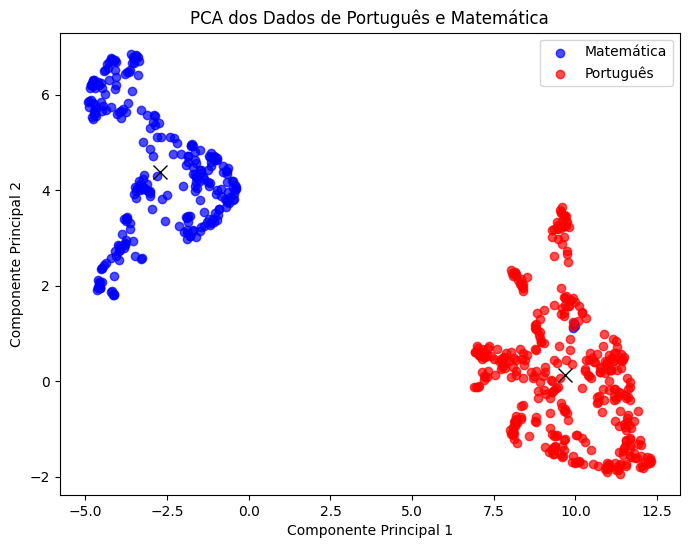

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(umap_mat_port[0:271, 0], umap_mat_port[0:271, 1], color='blue', label='Matemática', alpha=0.7)
plt.scatter(umap_mat_port[271:, 0], umap_mat_port[271:, 1], color='red', label='Português', alpha=0.7)
plt.plot(*centroide_mat, 'x', color='black', markersize=10)
plt.plot(*centroide_port, 'x', color='black', markersize=10)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA dos Dados de Português e Matemática')
plt.legend()
plt.show()


## Analisando texto com maior distância:

In [12]:
print(chunks_mat[index_maior_distancia_mat].page_content, "\n\n\n\n\n", chunks_port[index_maior_distancia_port].page_content)

Cristiane Borges Braga
Eliana Moreira de Oliveira
Gina Maria Porto de Aguiar Vieira
Glória Monteiro Macedo
Iraci Moraes Schmidlin
Irene Moura Silva
Isabel Cristina Pereira da Costa
Jane Fontes Guedes
Karine Nascimento Portela
Lívia Maria de Lima Santiago
Luciana Andrade Rodrigues
Marcia Roxana da Silva Regis
Maria Irene Silva de Moura
Maria Vanda Silvino da Silva
Marília Maia Moreira
Maria Luiza Maia
Saskia Natália Brígido Batista
Equipe Arte, Criação e Produção Visual
Ábner Di Cavalcanti Medeiros
Benghson da Silveira Dantas
Germano José Barros Pinheiro
José Albério Beserra 
José Stelio Sampaio Bastos Neto
Lucas de Brito Arruda 
Lucas Diego Rebouças Rocha
Marco Augusto M. Oliveira Júnior 
Equipe Web
Benghson da Silveira Dantas 
Fabrice Marc Joye
Herculano Gonçalves Santos
Lucas do Amaral Saboya
Samantha Onofre Lóssio 
Tibério Bezerra Soares
Revisão Textual
Aurea Suely Zavam
Nukácia Meyre Araújo de Almeida
Revisão Web
Antônio Carlos Marques Júnior
Débora Liberato Arruda Hissa 




 dade